# Application to Genome Multiple Alignment / Hamiltonian Path

- Sum-of-pairs (SP) alighment is [NP-Complete](https://www.liebertpub.com/doi/abs/10.1089/cmb.1994.1.337)
- We would like to work on this using annealing approach as discussed in [this paper](https://arxiv.org/abs/2004.06719)
- In typical setup, this kind of problem is solved by finding Hamiltonian path on the overlap-layout-consensus (OLC) graph of raw genome reads.(Figure1 in the paper)
- Solving Hamilton Cycle is also discussed in [Mahasinghe et al.](https://dl.acm.org/doi/10.1145/3290688.3290703)
- We focus here to solve Hamiltonian Cycle problem

## Construct a graph that has Hamiltonian Path
- Create a line and add random edge

In [ ]:
import networkx as nx


nodes = 10

G = nx.Graph()
for i in range(nodes):
    G.add_node(i)

for i in range(nodes - 1):
    G.add_edge(i, i + 1)

nx.draw(G)




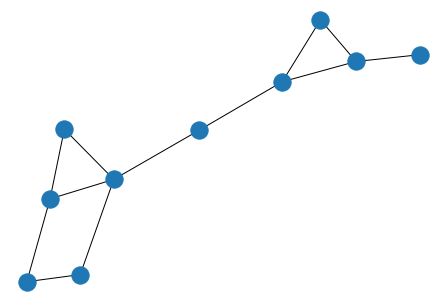

In [8]:
import random

for i in range(5):
    node1 = random.randrange(0, nodes)
    node2  = random.randrange(0, nodes)
    G.add_edge(node1, node2)

nx.draw(G)

### Hamiltonian definition

- We borrow the definition from the [paper](https://dl.acm.org/doi/10.1145/3290688.3290703) but removes cycle condition from $H$

$F(\mathbf{x})=H(\mathbf{x})+P_{1}(\mathbf{x})+P_{2}(\mathbf{x})$

where

$H(\mathbf{x})=\sum_{\left(i_{1}, i_{2}\right) \in V \times V-E(G)}\sum_{j=0}^{n-2} x_{i_{1}, j} x_{i_{2}, j+1}$


$P_{1}(\mathbf{x})=\sum_{i=0}^{n-1}\left(1-\sum_{j=0}^{n-1} x_{i, j}\right)^{2}$

and

$P_{2}(\mathbf{x})=\sum_{j=0}^{n-1}\left(1-\sum_{i=0}^{n-1} x_{i, j}\right)^{2}$


In [172]:
import numpy as np
from sympy import *
import itertools

sigmas = symbols("sigma0:100")
sigmas = np.reshape(sigmas, (nodes, nodes))
xs = (sigmas +1) /2
# iterate over all permutations of (0, 1, 2, 3) to make 4-tensor
H = 0
n = nodes

for i1 in range(nodes):
    for i2 in range(nodes):
        if not G.has_edge(i1, i2):
            for j in range(0, n -1):
                H += xs[i1, j] * xs[i2, j+1]

H

(sigma0/2 + 1/2)*(sigma1/2 + 1/2) + (sigma0/2 + 1/2)*(sigma21/2 + 1/2) + (sigma0/2 + 1/2)*(sigma31/2 + 1/2) + (sigma0/2 + 1/2)*(sigma41/2 + 1/2) + (sigma0/2 + 1/2)*(sigma51/2 + 1/2) + (sigma0/2 + 1/2)*(sigma61/2 + 1/2) + (sigma0/2 + 1/2)*(sigma71/2 + 1/2) + (sigma0/2 + 1/2)*(sigma81/2 + 1/2) + (sigma0/2 + 1/2)*(sigma91/2 + 1/2) + (sigma1/2 + 1/2)*(sigma2/2 + 1/2) + (sigma1/2 + 1/2)*(sigma20/2 + 1/2) + (sigma1/2 + 1/2)*(sigma22/2 + 1/2) + (sigma1/2 + 1/2)*(sigma30/2 + 1/2) + (sigma1/2 + 1/2)*(sigma32/2 + 1/2) + (sigma1/2 + 1/2)*(sigma40/2 + 1/2) + (sigma1/2 + 1/2)*(sigma42/2 + 1/2) + (sigma1/2 + 1/2)*(sigma50/2 + 1/2) + (sigma1/2 + 1/2)*(sigma52/2 + 1/2) + (sigma1/2 + 1/2)*(sigma60/2 + 1/2) + (sigma1/2 + 1/2)*(sigma62/2 + 1/2) + (sigma1/2 + 1/2)*(sigma70/2 + 1/2) + (sigma1/2 + 1/2)*(sigma72/2 + 1/2) + (sigma1/2 + 1/2)*(sigma80/2 + 1/2) + (sigma1/2 + 1/2)*(sigma82/2 + 1/2) + (sigma1/2 + 1/2)*(sigma90/2 + 1/2) + (sigma1/2 + 1/2)*(sigma92/2 + 1/2) + (sigma10/2 + 1/2)*(sigma11/2 + 1/2) + (s

In [173]:
P1 = 0
for i in range(n):
    temp = 0
    for j in range(n):
        temp += xs[i, j]
    P1 += (1 - temp) ** 2

P1

(-sigma0/2 - sigma1/2 - sigma2/2 - sigma3/2 - sigma4/2 - sigma5/2 - sigma6/2 - sigma7/2 - sigma8/2 - sigma9/2 - 4)**2 + (-sigma10/2 - sigma11/2 - sigma12/2 - sigma13/2 - sigma14/2 - sigma15/2 - sigma16/2 - sigma17/2 - sigma18/2 - sigma19/2 - 4)**2 + (-sigma20/2 - sigma21/2 - sigma22/2 - sigma23/2 - sigma24/2 - sigma25/2 - sigma26/2 - sigma27/2 - sigma28/2 - sigma29/2 - 4)**2 + (-sigma30/2 - sigma31/2 - sigma32/2 - sigma33/2 - sigma34/2 - sigma35/2 - sigma36/2 - sigma37/2 - sigma38/2 - sigma39/2 - 4)**2 + (-sigma40/2 - sigma41/2 - sigma42/2 - sigma43/2 - sigma44/2 - sigma45/2 - sigma46/2 - sigma47/2 - sigma48/2 - sigma49/2 - 4)**2 + (-sigma50/2 - sigma51/2 - sigma52/2 - sigma53/2 - sigma54/2 - sigma55/2 - sigma56/2 - sigma57/2 - sigma58/2 - sigma59/2 - 4)**2 + (-sigma60/2 - sigma61/2 - sigma62/2 - sigma63/2 - sigma64/2 - sigma65/2 - sigma66/2 - sigma67/2 - sigma68/2 - sigma69/2 - 4)**2 + (-sigma70/2 - sigma71/2 - sigma72/2 - sigma73/2 - sigma74/2 - sigma75/2 - sigma76/2 - sigma77/2 - si

In [174]:
P2 = 0
for j in range(n):
    temp = 0
    for i in range(n):
        temp += xs[i, j]
    P2 += (1 - temp) ** 2

P2

(-sigma0/2 - sigma10/2 - sigma20/2 - sigma30/2 - sigma40/2 - sigma50/2 - sigma60/2 - sigma70/2 - sigma80/2 - sigma90/2 - 4)**2 + (-sigma1/2 - sigma11/2 - sigma21/2 - sigma31/2 - sigma41/2 - sigma51/2 - sigma61/2 - sigma71/2 - sigma81/2 - sigma91/2 - 4)**2 + (-sigma12/2 - sigma2/2 - sigma22/2 - sigma32/2 - sigma42/2 - sigma52/2 - sigma62/2 - sigma72/2 - sigma82/2 - sigma92/2 - 4)**2 + (-sigma13/2 - sigma23/2 - sigma3/2 - sigma33/2 - sigma43/2 - sigma53/2 - sigma63/2 - sigma73/2 - sigma83/2 - sigma93/2 - 4)**2 + (-sigma14/2 - sigma24/2 - sigma34/2 - sigma4/2 - sigma44/2 - sigma54/2 - sigma64/2 - sigma74/2 - sigma84/2 - sigma94/2 - 4)**2 + (-sigma15/2 - sigma25/2 - sigma35/2 - sigma45/2 - sigma5/2 - sigma55/2 - sigma65/2 - sigma75/2 - sigma85/2 - sigma95/2 - 4)**2 + (-sigma16/2 - sigma26/2 - sigma36/2 - sigma46/2 - sigma56/2 - sigma6/2 - sigma66/2 - sigma76/2 - sigma86/2 - sigma96/2 - 4)**2 + (-sigma17/2 - sigma27/2 - sigma37/2 - sigma47/2 - sigma57/2 - sigma67/2 - sigma7/2 - sigma77/2 - 

In [175]:
F = H  + P1 + P2


In [176]:
import re
def separate_to_coeff_and_symbols(expr):
    syms = []
    coeffs = []
    for elem in Mul.make_args(expr):
       if type(elem) == Symbol:
           syms.append(elem)
       else:
           coeffs.append(elem)
    if coeffs:
       coeff = coeffs[0]
    else:
       coeff = 1
    return coeff, syms

def pow_to_mul(expr):
    """
    Convert integer powers in an expression to Muls, like a**2 => a*a.
    """
    pows = list(expr.atoms(Pow))
    if any(not e.is_Integer for b, e in (i.as_base_exp() for i in pows)):

        raise ValueError("A power contains a non-integer exponent")
    repl = zip(pows, (Mul(*[b]*e,evaluate=False) for b,e in (i.as_base_exp() for i in pows)))
    return expr.subs(repl)

def reconstruct_interaction_tensors_2_local(hamiltonian_expr):
    coeffs = []
    indices = []
    max_index = 0

    # Split into terms only contains multiplication
    for term in Add.make_args(expand(hamiltonian_expr)):
        coeff, syms = separate_to_coeff_and_symbols(pow_to_mul(term))
        this_indices = []
        for sym in syms:
            name = sym.name
            # Regex match to find index of the variable
            m = re.match(r"sigma(\d+)", name)
            index = int(m.groups(0)[0])
            this_indices.append(index)
        if this_indices:
            # Remember maximum index so that we can know the shape of h/J
            max_index = max(max_index, max(this_indices))
        this_indices = np.array(np.sort(this_indices), dtype=np.int)
        coeffs.append(coeff)
        indices.append(this_indices)
    dim = max_index + 1
    h = np.zeros(dim)
    J = np.zeros((dim, dim))
    E0 = 0
    for i, index in enumerate(indices):
        if len(index) == 1:
            h[index[0]] = coeffs[i]
        elif len(index) == 2:
            J[index[0], index[1]] = coeffs[i]
        else:
            E0 = coeffs[i]
    return E0, h, J

In [177]:
E0, h, J = reconstruct_interaction_tensors_2_local(F)

In [178]:
import pandas as pd
import numpy as np

from abstract_ising import AbstractIsing
import matplotlib.pyplot as plt

%matplotlib inline


def spinfield_1d(index, spin_count):
    spins = [1 if digit=='1' else -1 for digit in bin(index)[2:]]
    res = -np.ones(spin_count)
    res[spin_count -len(spins):spin_count] = spins
    return res

class IsingModel2D(AbstractIsing):

    def __init__(self, E0, h, J, seed=0):
        super().__init__()
        self.E0 = E0
        self.h = h
        self.J = J
        np.random.seed(seed)
        self.num_spins = h.shape[0]
        self.spins = 2*(np.random.rand(self.num_spins) < 0.5) - 1

    def energy(self, spins=None):
        spins = self.spins if spins is None else spins

        interaction1d = spins.dot(self.h)
        interaction2d = spins.dot(self.J.dot(spins))

        return self.E0 + interaction1d + interaction2d

    def exact(self):
        n = len(self.spins)
        all_one = 2 ** n - 1
        E = np.inf
        for i in range(all_one + 1):
            spins = spinfield_1d(i, n)
            E = min(E, self.energy(spins))
        return np.float(E)

    def energy_diff(self, i):
        diff1d = self.h[i]
        diff2d = self.J[i, :].dot(self.spins) + self.J[:, i].dot(self.spins)

        return -2 * self.spins[i] * (diff1d + diff2d)

    def rand_site(self):
        return (np.random.randint(self.num_spins),)

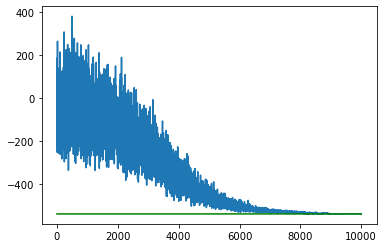

array([[-1,  1, -1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1,  1, -1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1,  1, -1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1,  1, -1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1,  1, -1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1,  1, -1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1,  1, -1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1,  1, -1],
       [-1, -1, -1, -1, -1, -1, -1, -1, -1,  1],
       [ 1, -1, -1, -1, -1, -1, -1, -1, -1, -1]])

In [194]:
def exp_schedule(T_i, T_f, N):
    t = np.arange(N+1)
    Ts = T_i * ((T_f/T_i) ** (t/N))
    return Ts

def anneal(ising,Ts):
    Es = np.zeros_like(Ts)
    min_spins = []
    min_E = None
    for i, t in enumerate(Ts):
        Es[i] = ising.mc_step(T=t)
        if not min_E:
            min_E = Es[i]
        else:
            if min_E > Es[i]:
                min_E = Es[i]
                min_spins = np.copy(ising.spins)
    return Es, min_spins

def calc_once(ising, Ts, include_exact=True, plot_title=None):

    ising.method = 'metropolis'
    Es, spins = anneal(ising, Ts)
    Ea = min(Es)

    plt.plot(np.arange(len(Es)), Es)
    Et = None
    plt.plot(np.arange(len(Ts)), np.repeat(Ea, len(Ts)), color='g')
    if include_exact:
        Et = ising.exact()
        print("Exact: ", Et)
        plt.plot(np.arange(len(Ts)), np.repeat(Et, len(Ts)), color='r')
    if(plot_title):
        plt.title(plot_title)
    plt.show()
    return spins
F = H  +  P1 + P2
E0, h, J = reconstruct_interaction_tensors_2_local(F)
ising = IsingModel2D(E0, h, J, seed=1)
spins = calc_once(ising, exp_schedule(400, 0.1, 10000), include_exact=False)
solution = np.reshape(spins, (nodes, nodes))

solution


- Each row corresponds to node, each column corresponds when the node appears in the path
  - 1 is for appearance
- One node for each cycle condition is satisfied
- We draw the path on the graph

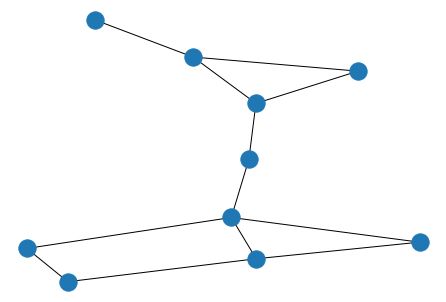

In [195]:
pos = nx.spring_layout(G)
ax = nx.draw(G, pos=pos)

def build_color_list(nodes, accent_nodes):
    node_color_list = []
    for i in nodes:
        if i in accent_nodes:
            node_color_list.append('#00FF00')
        else:
            node_color_list.append('#0000FF')
    return node_color_list

def build_node_path_label_dictionary(nodes, path):
    node_label_dict = {}
    for i in nodes:
        if i in path:
            node_label_dict[i] = path.index(i)
        else:
            node_label_dict[i] = ""
    return node_label_dict

def find_path(solution):
    path = []
    for col in range(solution.shape[1]):
        path.append(np.where(solution[:, col] == 1)[0][0])
    return path

def draw_graph(graph, node_color_list=None, node_label_dict=None, edge_color_list=None):
    nx.draw_networkx_edges(graph, pos, edge_color=edge_color_list)
    nx.draw_networkx_nodes(graph, pos, node_color=node_color_list)
    if node_label_dict:
        nx.draw_networkx_labels(graph, pos, node_label_dict)

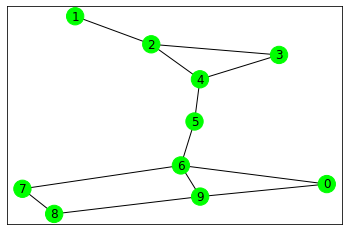

In [196]:
path = find_path(solution)
node_color_list = build_color_list(G.nodes, path)
node_label_dict = build_node_path_label_dictionary(G.nodes, path)
draw_graph(G, node_color_list, node_label_dict)

- Seems it does not well find optimal result
 - For weaker constraint on single-appearance constraint, it is not satisfied
 - Weaker constraint on non-existent-edge is unreasonable, as the problem here is the node 9 which does not connect

### Using non QUBO optimization
- This simple DFS is very fast and also returns collect result (ref. [Stackoverflow](https://stackoverflow.com/questions/47982604/hamiltonian-path-using-python))
- Hamiltonian path solver is not implemented in any commercial python package I found.

hamilton called with pt=0, path=[]
hamilton called with pt=1, path=[0]
hamilton called with pt=0, path=[0, 1]
pt 0 already in path [0, 1]
hamilton called with pt=2, path=[0, 1]
hamilton called with pt=1, path=[0, 1, 2]
pt 1 already in path [0, 1, 2]
hamilton called with pt=3, path=[0, 1, 2]
hamilton called with pt=2, path=[0, 1, 2, 3]
pt 2 already in path [0, 1, 2, 3]
hamilton called with pt=4, path=[0, 1, 2, 3]
hamilton called with pt=3, path=[0, 1, 2, 3, 4]
pt 3 already in path [0, 1, 2, 3, 4]
hamilton called with pt=5, path=[0, 1, 2, 3, 4]
hamilton called with pt=4, path=[0, 1, 2, 3, 4, 5]
pt 4 already in path [0, 1, 2, 3, 4, 5]
hamilton called with pt=6, path=[0, 1, 2, 3, 4, 5]
hamilton called with pt=5, path=[0, 1, 2, 3, 4, 5, 6]
pt 5 already in path [0, 1, 2, 3, 4, 5, 6]
hamilton called with pt=7, path=[0, 1, 2, 3, 4, 5, 6]
hamilton called with pt=6, path=[0, 1, 2, 3, 4, 5, 6, 7]
pt 6 already in path [0, 1, 2, 3, 4, 5, 6, 7]
hamilton called with pt=8, path=[0, 1, 2, 3, 4, 5, 6, 7

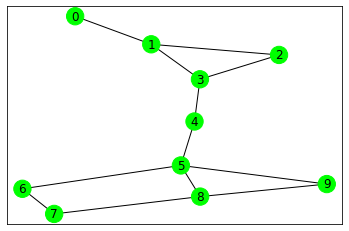

In [199]:
def hamilton(G, size, pt, path=[]):
    print('hamilton called with pt={}, path={}'.format(pt, path))
    if pt not in set(path):
        path.append(pt)
        if len(path)==size:
            return path
        for pt_next in G.neighbors(pt):
            res_path = [i for i in path]
            candidate = hamilton(G, size, pt_next, res_path)
            if candidate is not None:  # skip loop or dead end
                return candidate
        print('path {} is a dead end'.format(path))
    else:
        print('pt {} already in path {}'.format(pt, path))
    # loop or dead end, None is implicitly returned

path = hamilton(G, 10, 0)
node_color_list = build_color_list(G.nodes, path)
node_label_dict = build_node_path_label_dictionary(G.nodes, path)
draw_graph(G, node_color_list, node_label_dict)

### QUBO using D-Wave hybrid
- Hybrid solver solves the problem using same QUBO
- From this it seems that global update like [Swendsen-Wang](https://en.wikipedia.org/wiki/Swendsen–Wang_algorithm) and/or [replica exchange](https://en.wikipedia.org/wiki/Parallel_tempering), also importance sampling will be used in the hybrid solver

In [200]:
import dimod

def build_bqm_from_interaction_tensors(h, J):
    linear_coeffs = {}
    for i in range(h.shape[0]):
        linear_coeffs[i]  = h[i]

    quadratic_coeffs = {}
    for i in range(J.shape[0]):
        for j in range(J.shape[1]):
            quadratic_coeffs [(i, j)] = J[i, j]

    bqm = dimod.BinaryQuadraticModel(linear_coeffs, quadratic_coeffs, vartype='SPIN')
    return bqm

bqm = build_bqm_from_interaction_tensors(h, J)

from dwave.system import LeapHybridSampler
sampler = LeapHybridSampler()    # doctest: +SKIP
answer = sampler.sample(bqm)   # doctest: +SKIP

   0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 ... 99 energy num_oc.
0 +1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 +1 -1 -1 -1 -1 -1 -1 ... -1 -541.0       1
['SPIN', 1 rows, 1 samples, 100 variables]


In [208]:
lowest = answer.lowest()

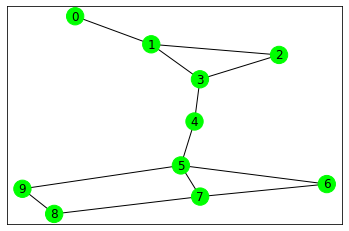

In [211]:
solution = lowest.to_pandas_dataframe().iloc[0, 0:100].to_numpy().reshape(10, 10)

path = find_path(solution)
node_color_list = build_color_list(G.nodes, path)
node_label_dict = build_node_path_label_dictionary(G.nodes, path)
draw_graph(G, node_color_list, node_label_dict)

### QUBO using D-Wave Tabu sampler
- This does not solve the problem by default setting
- Increasing num_shots to 100000 does not help

In [224]:
from tabu import TabuSampler
sampler = TabuSampler()
answer = sampler.sample(bqm)
lowest = answer.lowest()

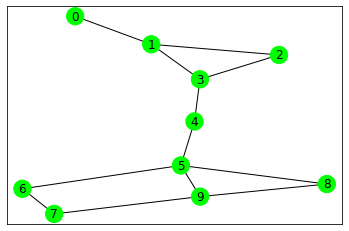

In [215]:
solution = lowest.to_pandas_dataframe().iloc[0, 0:100].to_numpy().reshape(10, 10)

path = find_path(solution)
node_color_list = build_color_list(G.nodes, path)
node_label_dict = build_node_path_label_dictionary(G.nodes, path)
draw_graph(G, node_color_list, node_label_dict)


### QUBO using D-Wave Neal
- This does not solve the problem by default setting

In [233]:
import neal

sampler = neal.SimulatedAnnealingSampler()
answer = sampler.sample(bqm)
lowest = answer.lowest()

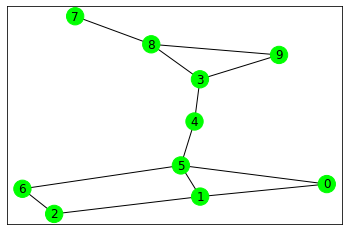

In [217]:
solution = lowest.to_pandas_dataframe().iloc[0, 0:100].to_numpy().reshape(10, 10)

path = find_path(solution)
node_color_list = build_color_list(G.nodes, path)
node_label_dict = build_node_path_label_dictionary(G.nodes, path)
draw_graph(G, node_color_list, node_label_dict)

### QUBO using D-Wave QPU
- 100 fully connected does not fit into single QPU
- 8 nodes will fit, so we re-define a problem here and re-solve it by our SA implementation

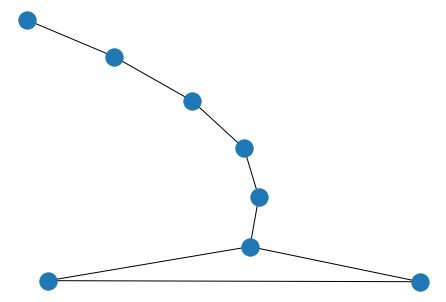

In [247]:

import networkx as nx
nodes = 8

G2 = nx.Graph()
for i in range(nodes):
    G2.add_node(i)

for i in range(nodes - 1):
    G2.add_edge(i, i + 1)

import random

for i in range(3):
    node1 = random.randrange(0, nodes)
    node2  = random.randrange(0, nodes)
    G2.add_edge(node1, node2)

nx.draw(G2)

In [248]:

sigmas = symbols("sigma0:64")
sigmas = np.reshape(sigmas, (nodes, nodes))
xs = (sigmas +1) /2
# iterate over all permutations of (0, 1, 2, 3) to make 4-tensor
H = 0
n = nodes

for i1 in range(nodes):
    for i2 in range(nodes):
        if not G.has_edge(i1, i2):
            for j in range(0, n -1):
                H += xs[i1, j] * xs[i2, j+1]

H

(sigma0/2 + 1/2)*(sigma1/2 + 1/2) + (sigma0/2 + 1/2)*(sigma17/2 + 1/2) + (sigma0/2 + 1/2)*(sigma25/2 + 1/2) + (sigma0/2 + 1/2)*(sigma33/2 + 1/2) + (sigma0/2 + 1/2)*(sigma41/2 + 1/2) + (sigma0/2 + 1/2)*(sigma49/2 + 1/2) + (sigma0/2 + 1/2)*(sigma57/2 + 1/2) + (sigma1/2 + 1/2)*(sigma16/2 + 1/2) + (sigma1/2 + 1/2)*(sigma18/2 + 1/2) + (sigma1/2 + 1/2)*(sigma2/2 + 1/2) + (sigma1/2 + 1/2)*(sigma24/2 + 1/2) + (sigma1/2 + 1/2)*(sigma26/2 + 1/2) + (sigma1/2 + 1/2)*(sigma32/2 + 1/2) + (sigma1/2 + 1/2)*(sigma34/2 + 1/2) + (sigma1/2 + 1/2)*(sigma40/2 + 1/2) + (sigma1/2 + 1/2)*(sigma42/2 + 1/2) + (sigma1/2 + 1/2)*(sigma48/2 + 1/2) + (sigma1/2 + 1/2)*(sigma50/2 + 1/2) + (sigma1/2 + 1/2)*(sigma56/2 + 1/2) + (sigma1/2 + 1/2)*(sigma58/2 + 1/2) + (sigma10/2 + 1/2)*(sigma11/2 + 1/2) + (sigma10/2 + 1/2)*(sigma33/2 + 1/2) + (sigma10/2 + 1/2)*(sigma35/2 + 1/2) + (sigma10/2 + 1/2)*(sigma41/2 + 1/2) + (sigma10/2 + 1/2)*(sigma43/2 + 1/2) + (sigma10/2 + 1/2)*(sigma49/2 + 1/2) + (sigma10/2 + 1/2)*(sigma51/2 + 1/2

In [249]:
P1 = 0
for i in range(n):
    temp = 0
    for j in range(n):
        temp += xs[i, j]
    P1 += (1 - temp) ** 2

P1

(-sigma0/2 - sigma1/2 - sigma2/2 - sigma3/2 - sigma4/2 - sigma5/2 - sigma6/2 - sigma7/2 - 3)**2 + (-sigma10/2 - sigma11/2 - sigma12/2 - sigma13/2 - sigma14/2 - sigma15/2 - sigma8/2 - sigma9/2 - 3)**2 + (-sigma16/2 - sigma17/2 - sigma18/2 - sigma19/2 - sigma20/2 - sigma21/2 - sigma22/2 - sigma23/2 - 3)**2 + (-sigma24/2 - sigma25/2 - sigma26/2 - sigma27/2 - sigma28/2 - sigma29/2 - sigma30/2 - sigma31/2 - 3)**2 + (-sigma32/2 - sigma33/2 - sigma34/2 - sigma35/2 - sigma36/2 - sigma37/2 - sigma38/2 - sigma39/2 - 3)**2 + (-sigma40/2 - sigma41/2 - sigma42/2 - sigma43/2 - sigma44/2 - sigma45/2 - sigma46/2 - sigma47/2 - 3)**2 + (-sigma48/2 - sigma49/2 - sigma50/2 - sigma51/2 - sigma52/2 - sigma53/2 - sigma54/2 - sigma55/2 - 3)**2 + (-sigma56/2 - sigma57/2 - sigma58/2 - sigma59/2 - sigma60/2 - sigma61/2 - sigma62/2 - sigma63/2 - 3)**2

In [250]:
P2 = 0
for j in range(n):
    temp = 0
    for i in range(n):
        temp += xs[i, j]
    P2 += (1 - temp) ** 2

P2

(-sigma0/2 - sigma16/2 - sigma24/2 - sigma32/2 - sigma40/2 - sigma48/2 - sigma56/2 - sigma8/2 - 3)**2 + (-sigma1/2 - sigma17/2 - sigma25/2 - sigma33/2 - sigma41/2 - sigma49/2 - sigma57/2 - sigma9/2 - 3)**2 + (-sigma10/2 - sigma18/2 - sigma2/2 - sigma26/2 - sigma34/2 - sigma42/2 - sigma50/2 - sigma58/2 - 3)**2 + (-sigma11/2 - sigma19/2 - sigma27/2 - sigma3/2 - sigma35/2 - sigma43/2 - sigma51/2 - sigma59/2 - 3)**2 + (-sigma12/2 - sigma20/2 - sigma28/2 - sigma36/2 - sigma4/2 - sigma44/2 - sigma52/2 - sigma60/2 - 3)**2 + (-sigma13/2 - sigma21/2 - sigma29/2 - sigma37/2 - sigma45/2 - sigma5/2 - sigma53/2 - sigma61/2 - 3)**2 + (-sigma14/2 - sigma22/2 - sigma30/2 - sigma38/2 - sigma46/2 - sigma54/2 - sigma6/2 - sigma62/2 - 3)**2 + (-sigma15/2 - sigma23/2 - sigma31/2 - sigma39/2 - sigma47/2 - sigma55/2 - sigma63/2 - sigma7/2 - 3)**2

In [251]:
F = H  + P1 + P2

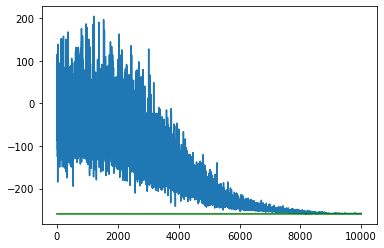

In [252]:
E0, h, J = reconstruct_interaction_tensors_2_local(F)
ising = IsingModel2D(E0, h, J, seed=1)
spins = calc_once(ising, exp_schedule(400, 0.1, 10000), include_exact=False)
solution = np.reshape(spins, (nodes, nodes))

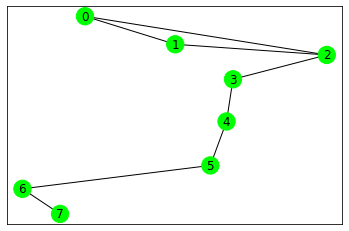

In [253]:

path = find_path(solution)
node_color_list = build_color_list(G2.nodes, path)
node_label_dict = build_node_path_label_dictionary(G2.nodes, path)
draw_graph(G2, node_color_list, node_label_dict)


- Actually in this case we can solve it using our manual SA
- Lets do this on QPU

In [254]:
from dwave.system import DWaveSampler, EmbeddingComposite

bqm = build_bqm_from_interaction_tensors(h, J)
sampler = EmbeddingComposite(DWaveSampler())
answer = sampler.sample(bqm, num_reads=10000)
lowest = answer.lowest()

In [259]:
solution = lowest.to_pandas_dataframe().iloc[0, 0:64].to_numpy().reshape(8, 8)

solution

array([[-1., -1., -1., -1., -1., -1., -1.,  1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.],
       [ 1., -1., -1., -1.,  1., -1., -1., -1.],
       [-1.,  1., -1.,  1., -1., -1., -1., -1.],
       [-1., -1.,  1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.],
       [-1., -1., -1., -1., -1., -1.,  1., -1.],
       [-1., -1., -1., -1., -1., -1., -1., -1.]])

In [260]:
path = find_path(solution)
node_color_list = build_color_list(G2.nodes, path)
node_label_dict = build_node_path_label_dictionary(G2.nodes, path)
draw_graph(G2, node_color_list, node_label_dict)

IndexError: index 0 is out of bounds for axis 0 with size 0

### QPU does not work

- This does not find satisfactory path and raise error because there's no 1 in 7th column